# 线性回归
:label:`sec_linear_regression`

*回归*（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。
在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与*预测*（prediction）有关。
当我们想预测一个数值时，就会涉及到回归问题。
常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、
预测需求（零售销量等）。
但不是所有的*预测*都是回归问题。
在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。

## 线性回归的基本元素

*线性回归*（linear regression）可以追溯到19世纪初，
它在回归的各种标准工具中最简单而且最流行。
线性回归基于几个简单的假设：
首先，假设自变量$\mathbf{x}$和因变量$y$之间的关系是线性的，
即$y$可以表示为$\mathbf{x}$中元素的加权和，这里通常允许包含观测值的一些噪声；
其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释*线性回归*，我们举一个实际的例子：
我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。
为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。
这个数据集包括了房屋的销售价格、面积和房龄。
在机器学习的术语中，该数据集称为*训练数据集*（training data set）
或*训练集*（training set）。
每行数据（比如一次房屋交易相对应的数据）称为*样本*（sample），
也可以称为*数据点*（data point）或*数据样本*（data instance）。
我们把试图预测的目标（比如预测房屋价格）称为*标签*（label）或*目标*（target）。
预测所依据的自变量（面积和房龄）称为*特征*（feature）或*协变量*（covariate）。

通常，我们使用$n$来表示数据集中的样本数。
对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，
其对应的标签是$y^{(i)}$。

### 线性模型
:label:`subsec_linear_model`

线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$
:eqlabel:`eq_price-area`

 :eqref:`eq_price-area`中的$w_{\mathrm{area}}$和$w_{\mathrm{age}}$
称为*权重*（weight），权重决定了每个特征对我们预测值的影响。
$b$称为*偏置*（bias）、*偏移量*（offset）或*截距*（intercept）。
偏置是指当所有特征都取值为0时，预测值应该为多少。
即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。
如果没有偏置项，我们模型的表达能力将受到限制。
严格来说， :eqref:`eq_price-area`是输入特征的一个
*仿射变换*（affine transformation）。
仿射变换的特点是通过加权和对特征进行*线性变换*（linear transformation），
并通过偏置项来进行*平移*（translation）。

给定一个数据集，我们的目标是寻找模型的权重$\mathbf{w}$和偏置$b$，
使得根据模型做出的预测大体符合数据里的真实价格。
输出的预测值由输入特征通过*线性模型*的仿射变换决定，仿射变换由所选权重和偏置确定。

而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。
当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$
（通常使用“尖角”符号表示$y$的估计值）表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，
并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，
我们可以用点积形式来简洁地表达模型：

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$
:eqlabel:`eq_linreg-y`

在 :eqref:`eq_linreg-y`中，
向量$\mathbf{x}$对应于单个数据样本的特征。
用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
可以很方便地引用我们整个数据集的$n$个样本。
其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。

对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$
可以通过矩阵-向量乘法表示为：

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

这个过程中的求和将使用广播机制
（广播机制在 :numref:`subsec_broadcasting`中有详细介绍）。
给定训练数据特征$\mathbf{X}$和对应的已知标签$\mathbf{y}$，
线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$：
当给定从$\mathbf{X}$的同分布中取样的新样本特征时，
这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。

虽然我们相信给定$\mathbf{x}$预测$y$的最佳模型会是线性的，
但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1 \leq i \leq n$，$y^{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)}+b$。
无论我们使用什么手段来观察特征$\mathbf{X}$和标签$\mathbf{y}$，
都可能会出现少量的观测误差。
因此，即使确信特征与标签的潜在关系是线性的，
我们也会加入一个噪声项来考虑观测误差带来的影响。

在开始寻找最好的*模型参数*（model parameters）$\mathbf{w}$和$b$之前，
我们还需要两个东西：
（1）一种模型质量的度量方式；
（2）一种能够更新模型以提高模型预测质量的方法。

### 损失函数

在我们开始考虑如何用模型*拟合*（fit）数据之前，我们需要确定一个拟合程度的度量。
*损失函数*（loss function）能够量化目标的*实际*值与*预测*值之间的差距。
通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。
回归问题中最常用的损失函数是平方误差函数。
当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$
:eqlabel:`eq_mse`

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些
（因为当我们对损失函数求导后常数系数为1）。
由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。
为了进一步说明，来看下面的例子。
我们为一维情况下的回归问题绘制图像，如 :numref:`fig_fit_linreg`所示。

![用线性模型拟合数据。](../img/fit-linreg.svg)
:label:`fig_fit_linreg`

由于平方误差函数中的二次方项，
估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。
为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），
这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 解析解

线性回归刚好是一个很简单的优化问题。
与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来，
这类解叫作解析解（analytical solution）。
首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。
我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。
这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。
将损失关于$\mathbf{w}$的导数设为0，得到解析解：

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。
解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

### 随机梯度下降

即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。
在许多任务上，那些难以优化的模型效果要更好。
因此，弄清楚如何训练这些难以优化的模型是非常重要的。

本书中我们用到一种名为*梯度下降*（gradient descent）的方法，
这种方法几乎可以优化所有深度学习模型。
它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）
关于模型参数的导数（在这里也可以称为梯度）。
但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。
因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，
这种变体叫做*小批量随机梯度下降*（minibatch stochastic gradient descent）。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，
它是由固定数量的训练样本组成的。
然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。
最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下：
（1）初始化模型参数的值，如随机初始化；
（2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。
对于平方损失和仿射变换，我们可以明确地写成如下形式:

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$
:eqlabel:`eq_linreg_batch_update`

公式 :eqref:`eq_linreg_batch_update`中的$\mathbf{w}$和$\mathbf{x}$都是向量。
在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。
$|\mathcal{B}|$表示每个小批量中的样本数，这也称为*批量大小*（batch size）。
$\eta$表示*学习率*（learning rate）。
批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。
这些可以调整但不在训练过程中更新的参数称为*超参数*（hyperparameter）。
*调参*（hyperparameter tuning）是选择超参数的过程。
超参数通常是我们根据训练迭代结果来调整的，
而训练迭代结果是在独立的*验证数据集*（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），
我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。
但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。
因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。
但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。
深度学习实践者很少会去花费大力气寻找这样一组参数，使得在*训练集*上的损失达到最小。
事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，
这一挑战被称为*泛化*（generalization）。

### 用模型进行预测

给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，
现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。
给定特征估计目标的过程通常称为*预测*（prediction）或*推断*（inference）。

本书将尝试坚持使用*预测*这个词。
虽然*推断*这个词已经成为深度学习的标准术语，但其实*推断*这个词有些用词不当。
在统计学中，*推断*更多地表示基于数据集估计参数。
当深度学习从业者与统计学家交谈时，术语的误用经常导致一些误解。

## 矢量化加速

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。
为了实现这一点，需要(**我们对计算进行矢量化，
从而利用线性代数库，而不是在Python中编写开销高昂的for循环**)。


In [1]:
%matplotlib inline
import math
import time
import numpy as np

为了说明矢量化为什么如此重要，我们考虑(**对向量相加的两种方法**)。
我们实例化两个全为1的10000维向量。
在一种方法中，我们将使用Python的for循环遍历向量；
在另一种方法中，我们将依赖对`+`的调用。


In [2]:
import mindspore
import mindspore.ops as ops

n = 10000
a = ops.ones([n], dtype=mindspore.float32)
b = ops.ones([n], dtype=mindspore.float32)

In [3]:
a

Tensor(shape=[10000], dtype=Float32, value= [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00 ...  1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

由于在本书中我们将频繁地进行运行时间的基准测试，所以[**我们定义一个计时器**]：


In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。

首先，[**我们使用for循环，每次执行一位的加法**]。


In [5]:
c = ops.zeros([n], dtype=mindspore.float32)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'4.95702 sec'

(**或者，我们使用重载的`+`运算符来计算按元素的和**)。


In [6]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00017 sec'

结果很明显，第二种方法比第一种方法快得多。
矢量化代码通常会带来数量级的加速。
另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

## 正态分布与平方损失
:label:`subsec_normal_distribution_and_squared_loss`

接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。
正态分布（normal distribution），也称为*高斯分布*（Gaussian distribution），
最早由德国数学家高斯（Gauss）应用于天文学研究。
简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

下面[**我们定义一个Python函数来计算正态分布**]。


In [7]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

我们现在(**可视化正态分布**)。


In [8]:
from d2lkewei import mindspore as d2l

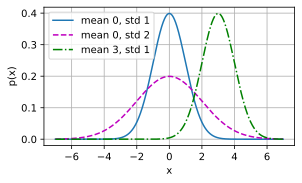

In [9]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

就像我们所看到的，改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是：
我们假设了观测中包含噪声，其中噪声服从正态分布。
噪声正态分布如下式:

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$

其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。

因此，我们现在可以写出通过给定的$\mathbf{x}$观测到特定$y$的*似然*（likelihood）：

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的*似然*最大的值：

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

根据极大似然估计法选择的估计量称为*极大似然估计量*。
虽然使许多指数函数的乘积最大化看起来很困难，
但是我们可以在不改变目标的前提下，通过最大化似然对数来简化。
由于历史原因，优化通常是说最小化而不是最大化。
我们可以改为*最小化负对数似然*$-\log P(\mathbf y \mid \mathbf X)$。
由此可以得到的数学公式是：

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项，
因为第一项不依赖于$\mathbf{w}$和$b$。
现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。
幸运的是，上面式子的解并不依赖于$\sigma$。
因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

## 从线性回归到深度网络

到目前为止，我们只谈论了线性模型。
尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型，
从而把线性模型看作一个神经网络。
首先，我们用“层”符号来重写这个模型。

### 神经网络图

深度学习从业者喜欢绘制图表来可视化模型中正在发生的事情。
在 :numref:`fig_single_neuron`中，我们将线性回归模型描述为一个神经网络。
需要注意的是，该图只显示连接模式，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。

![线性回归是一个单层神经网络。](../img/singleneuron.svg)
:label:`fig_single_neuron`

在 :numref:`fig_single_neuron`所示的神经网络中，输入为$x_1, \ldots, x_d$，
因此输入层中的*输入数*（或称为*特征维度*，feature dimensionality）为$d$。
网络的输出为$o_1$，因此输出层中的*输出数*是1。
需要注意的是，输入值都是已经给定的，并且只有一个*计算*神经元。
由于模型重点在发生计算的地方，所以通常我们在计算层数时不考虑输入层。
也就是说， :numref:`fig_single_neuron`中神经网络的*层数*为1。
我们可以将线性回归模型视为仅由单个人工神经元组成的神经网络，或称为单层神经网络。

对于线性回归，每个输入都与每个输出（在本例中只有一个输出）相连，
我们将这种变换（ :numref:`fig_single_neuron`中的输出层）
称为*全连接层*（fully-connected layer）或称为*稠密层*（dense layer）。
下一章将详细讨论由这些层组成的网络。

### 生物学

线性回归发明的时间（1795年）早于计算神经科学，所以将线性回归描述为神经网络似乎不合适。
当控制学家、神经生物学家沃伦·麦库洛奇和沃尔特·皮茨开始开发人工神经元模型时，
他们为什么将线性模型作为一个起点呢？
我们来看一张图片 :numref:`fig_Neuron`：
这是一张由*树突*（dendrites，输入终端）、
*细胞核*（nucleus，CPU）组成的生物神经元图片。
*轴突*（axon，输出线）和*轴突端子*（axon terminal，输出端子）
通过*突触*（synapse）与其他神经元连接。

![真实的神经元。](../img/neuron.svg)
:label:`fig_Neuron`

树突中接收到来自其他神经元（或视网膜等环境传感器）的信息$x_i$。
该信息通过*突触权重*$w_i$来加权，以确定输入的影响（即，通过$x_i w_i$相乘来激活或抑制）。
来自多个源的加权输入以加权和$y = \sum_i x_i w_i + b$的形式汇聚在细胞核中，
然后将这些信息发送到轴突$y$中进一步处理，通常会通过$\sigma(y)$进行一些非线性处理。
之后，它要么到达目的地（例如肌肉），要么通过树突进入另一个神经元。

当然，许多这样的单元可以通过正确连接和正确的学习算法拼凑在一起，
从而产生的行为会比单独一个神经元所产生的行为更有趣、更复杂，
这种想法归功于我们对真实生物神经系统的研究。

当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感。
我们援引斯图尔特·罗素和彼得·诺维格在他们的经典人工智能教科书
*Artificial Intelligence:A Modern Approach* :cite:`Russell.Norvig.2016`
中所说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。
同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。

## 小结

* 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
* 矢量化使数学表达上更简洁，同时运行的更快。
* 最小化目标函数和执行极大似然估计等价。
* 线性回归模型也是一个简单的神经网络。

## 练习

1. 假设我们有一些数据$x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i (x_i - b)^2$。
    1. 找到最优值$b$的解析解。
    1. 这个问题及其解与正态分布有什么关系?
1. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\mathbf X$添加所有值为1的一列来做到这一点）。
    1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
    1. 计算损失对$w$的梯度。
    1. 通过将梯度设为0、求解矩阵方程来找到解析解。
    1. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？
1. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$
    1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。
    1. 请试着写出解析解。
    1. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。


## 练习

1. 假设我们有一些数据$x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i (x_i - b)^2$。
    1. 找到最优值$b$的解析解。
    1. 这个问题及其解与正态分布有什么关系?
1. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\mathbf X$添加所有值为1的一列来做到这一点）。
    1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
    1. 计算损失对$w$的梯度。
    1. 通过将梯度设为0、求解矩阵方程来找到解析解。
    1. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？
1. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$
    1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。
    1. 请试着写出解析解。
    1. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

## 第1题

1. 假设我们有一些数据$x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i (x_i - b)^2$。
    1. 找到最优值$b$的解析解。
    1. 这个问题及其解与正态分布有什么关系?

1. 解答：
    1. $b$的最优解是$x_1, \ldots, x_n$的平均值。这是因为$\sum_i (x_i - b)^2 = \sum_i (x_i - \bar{x})^2 + n(\bar{x} - b)^2$，其中$\bar{x}$是$x_1, \ldots, x_n$的平均值。由于$n(\bar{x} - b)^2 \geq 0$，因此当且仅当$b = \bar{x}$时，$\sum_i (x_i - b)^2$最小。
    2. 这个问题与正态分布有关，因为如果我们假设$x_1, \ldots, x_n$是从正态分布中采样得到的，那么$b = \bar{x}$是最大似然估计下的均值。也就是说，如果我们假设数据来自正态分布，并且我们想要找到一个最好的均值来描述这些数据，那么我们应该选择样本均值作为估计量。

## 第2题

2. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\mathbf X$添加所有值为1的一列来做到这一点）。
    1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
    1. 计算损失对$w$的梯度。
    1. 通过将梯度设为0、求解矩阵方程来找到解析解。
    1. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

2. 解答：
    1. 设$\mathbf X \in \mathbb R^{n \times d}$是输入特征，$\mathbf y \in \mathbb R^n$是标签。线性回归的目标是找到一组权重向量$\mathbf w \in \mathbb R^d$，使得预测值$\hat{\mathbf y} = \mathbf X\mathbf w$与真实标签$\mathbf y$之间的平方误差最小化。忽略偏置$b$，优化问题可以写成以下形式：
    $$
    \min_{\mathbf w} \frac{1}{2n} \| \mathbf X\mathbf w - \mathbf y \|_2^2.
    $$

    2. 损失函数对权重向量$\mathbf w$的梯度为

    $$
    \nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \mathbf X^\top (\hat{\mathbf y} - \mathbf y).
    $$

    3. 将梯度设为0，我们得到了解析解：

    $$
    \hat{\mathbf w} = (\mathbf X^\top \mathbf X)^{-1} \mathbf X^\top \mathbf y.
    $$

    4. 当数据集较小时，解析解可能比随机梯度下降更好。然而，在大型数据集上，计算解析解可能会非常耗时，或者存在多个局部最小的情况。此外，当矩阵$\mathbf X^\top\mathbf X$不可逆时，解析解不存在。在这种情况下，我们需要使用正则化或数值优化方法。

第二题详细步骤：
对于线性回归问题，损失函数是平方误差。假设我们有一个数据集$\{(\mathbf x_1, y_1), \ldots, (\mathbf x_n, y_n)\}$，其中$\mathbf x_i \in \mathbb R^d$是输入特征，$y_i \in \mathbb R$是标签。我们的目标是找到一组权重向量$\mathbf w \in \mathbb R^d$，使得预测值$\hat{y}_i = \mathbf w^\top\mathbf x_i$与真实标签$y_i$之间的平方误差最小化。因此，损失函数可以写成以下形式：

$$
L(\mathbf w) = \frac{1}{2n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{2n} \| \mathbf X\mathbf w - \mathbf y \|_2^2,
$$

其中$\mathbf X = [\mathbf x_1^\top, \ldots, \mathbf x_n^\top]^\top$是输入特征的矩阵，$\mathbf y = [y_1, \ldots, y_n]^\top$是标签向量。

损失函数对权重向量$\mathbf w$的梯度为

$$
\nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \nabla_{\mathbf w} \hat{y}_i = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \mathbf x_i,
$$

其中$\hat{\mathbf y} = [\hat{y}_1, \ldots, \hat{y}_n]^\top$是预测值向量。将其写成矩阵和向量表示法，我们得到：

$$
\nabla_{\mathbf w} L(\mathbf w) =  \frac{1}{n}  (\hat{\mathbf y} -  {\mathbf y})^\top {\mathbf X}.
$$

因此，

$$
\nabla_{\mathbf w} L(\mathbf w) =  \frac{1}{n}  {\mathbf X}^\top (\hat{\mathbf y} -  {\mathbf y}),
$$


我们要求解的是：$$ \nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 $$

其中，$\hat{\mathbf y}$ 是预测值，$\mathbf y$ 是真实值，$\mathbf X$ 是输入数据。我们可以将上式变形为：

$$ \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 $$

进一步变形得到：

$$ \mathbf X^\top \hat{\mathbf y} = \mathbf X^\top \mathbf y $$

因为 $\hat{\mathbf y} = \mathbf X\hat{\mathbf w}$，所以：

$$ \begin{aligned} &\quad\; \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 \\ &\Rightarrow\; \mathbf X^\top ({\mathbf X}{\mathbf w} - \mathbf y) = 0 \\ &\Rightarrow\; {\mathbf w} = ({\mathbf X}^\top{\mathbf X})^{-1}{\mathbf X}^\top\mathbf y \\ \end{aligned} $$

这就是推导过程。

## 第三题

3. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$
    1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。
    1. 请试着写出解析解。
    1. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。



3. 解答
    1. 
    对于高斯分布而言，其概率密度函数为：$$p(y) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y-\mu)^2}{2\sigma^2}}$$ 其中μ是均值，σ是标准差。

    将上式取负对数并展开得到：$$-\log p(y) = \frac{1}{2}\log(2\pi\sigma^2) + \frac{(y-\mu)^2}{2\sigma^2} $$

    对于线性回归模型而言，它的概率密度函数为：$$p(y|x,w,b) = N(y|Xw+b,\sigma^2)$$ 其中N表示高斯分布。

    因此，我们可以得到负对数似然函数的结果为：$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \log p(y_i|x_i,w,b) = \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}||y-Xw-b||^2_2 $$

    其中C是一个常数，n是样本数量。
    
    因此，我们可以得到负对数似然函数的结果为：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$


提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

- 随机梯度下降算法（SGD）是一种用于优化目标函数的迭代方法。在每次迭代中，SGD从训练集中随机选择一个样本$(\mathbf x_i, y_i)$并计算其梯度。然后它使用该梯度来更新参数：
  $$
  \begin{aligned}
  &\mathbf w^{(t+1)} = \mathbf w^{(t)} - \eta_t\nabla_{\mathbf w} L(y_i, f(\mathbf x_i; \theta)), \\
  &b^{(t+1)} = b^{(t)} - \eta_t\nabla_b L(y_i, f(\mathbf x_i; \theta)),
  \end{aligned}
  $$
  其中$L(y,f(\cdot;\theta))$是损失函数，$\eta_t$是学习率，$\theta=(\mathbf w,b)$是模型参数。

  在本例中，我们可以使用均方误差作为损失函数：
  $$
  L(y,f(\cdot;\theta)) = (y - (\mathbf w^\top\mathbf x + b))^2.
  $$

  然而，在驻点附近可能会发生以下情况：当梯度接近零时，步长也会变得非常小，这可能导致算法收敛速度变慢。为了解决这个问题，我们可以使用一些技巧来加速收敛速度。例如，我们可以使用动量或自适应学习率等技术来加速收敛速度。

第二题详细推导

对于线性回归问题，损失函数是平方误差。假设我们有一个数据集$\{(\mathbf x_1, y_1), \ldots, (\mathbf x_n, y_n)\}$，其中$\mathbf x_i \in \mathbb R^d$是输入特征，$y_i \in \mathbb R$是标签。我们的目标是找到一组权重向量$\mathbf w \in \mathbb R^d$，使得预测值$\hat{y}_i = \mathbf w^\top\mathbf x_i$与真实标签$y_i$之间的平方误差最小化。因此，损失函数可以写成以下形式：

$$
L(\mathbf w) = \frac{1}{2n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{2n} \| \mathbf X\mathbf w - \mathbf y \|_2^2,
$$

其中$\mathbf X = [\mathbf x_1^\top, \ldots, \mathbf x_n^\top]^\top$是输入特征的矩阵，$\mathbf y = [y_1, \ldots, y_n]^\top$是标签向量。

损失函数对权重向量$\mathbf w$的梯度为

$$
\nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \mathbf x_i = \frac{1}{n} \mathbf X^\top (\hat{\mathbf y} - \mathbf y),
$$

其中$\hat{\mathbf y} = [\hat{y}_1, \ldots, \hat{y}_n]^\top$是预测值向量。

1. $\hat{y}_i = \mathbf w^\top\mathbf x_i$是一个标量，因此$\nabla_{\mathbf w} \hat{y}_i = \mathbf x_i$是一个向量。因此，我们可以将$\nabla_{\mathbf w} L(\mathbf w)$写成以下形式：

$$
\nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \nabla_{\mathbf w} \hat{y}_i = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \mathbf x_i.
$$

2. $\mathbf X$的转置$X^\top$是为了使矩阵乘法$\mathbf X^\top (\hat{\mathbf y} - \mathbf y)$成立。具体来说，$\hat{\mathbf y}$和$\mathbf y$都是列向量，因此它们的差也是列向量。我们需要将其与$\mathbf X^\top$相乘，以便得到一个与权重向量$\mathbf w$具有相同维度的梯度向量。

对于线性回归问题，损失函数是平方误差。假设我们有一个数据集$\{(\mathbf x_1, y_1), \ldots, (\mathbf x_n, y_n)\}$，其中$\mathbf x_i \in \mathbb R^d$是输入特征，$y_i \in \mathbb R$是标签。我们的目标是找到一组权重向量$\mathbf w \in \mathbb R^d$，使得预测值$\hat{y}_i = \mathbf w^\top\mathbf x_i$与真实标签$y_i$之间的平方误差最小化。因此，损失函数可以写成以下形式：

$$
L(\mathbf w) = \frac{1}{2n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{2n} \| \mathbf X\mathbf w - \mathbf y \|_2^2,
$$

其中$\mathbf X = [\mathbf x_1^\top, \ldots, \mathbf x_n^\top]^\top$是输入特征的矩阵，$\mathbf y = [y_1, \ldots, y_n]^\top$是标签向量。

损失函数对权重向量$\mathbf w$的梯度为

$$
\nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \nabla_{\mathbf w} \hat{y}_i = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \mathbf x_i,
$$

其中$\hat{\mathbf y} = [\hat{y}_1, \ldots, \hat{y}_n]^\top$是预测值向量。将其写成矩阵和向量表示法，我们得到：

$$
\nabla_{\mathbf w} L(\mathbf w) =  \frac{1}{n}  (\hat{\mathbf y} -  {\mathbf y})^\top {\mathbf X}.
$$

因此，

$$
\nabla_{\mathbf w} L(\mathbf w) =  \frac{1}{n}  {\mathbf X}^\top (\hat{\mathbf y} -  {\mathbf y}),
$$


我们要求解的是：$$ \nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 $$

其中，$\hat{\mathbf y}$ 是预测值，$\mathbf y$ 是真实值，$\mathbf X$ 是输入数据。我们可以将上式变形为：

$$ \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 $$

进一步变形得到：

$$ \mathbf X^\top \hat{\mathbf y} = \mathbf X^\top \mathbf y $$

因为 $\hat{\mathbf y} = \mathbf X\hat{\mathbf w}$，所以：

$$ \begin{aligned} &\quad\; \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 \\ &\Rightarrow\; \mathbf X^\top ({\mathbf X}{\mathbf w} - \mathbf y) = 0 \\ &\Rightarrow\; {\mathbf w} = ({\mathbf X}^\top{\mathbf X})^{-1}{\mathbf X}^\top\mathbf y \\ \end{aligned} $$

这就是推导过程。

In [ ]:
第3题详细推导

好的，让我来解释一下。我们的模型是$-\log P(\mathbf y \mid \mathbf X)$，其中$\mathbf y$是标签向量，$\mathbf X$是特征矩阵。假设我们有$n$个样本，每个样本都有$d$个特征。那么我们的模型可以写成：$$-\log P(\mathbf y \mid \mathbf X) = -\sum_{i=1}^n \log P(y_i \mid \mathbf x_i)$$

在这个问题中，我们的噪声模型是指数分布，因此$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$。因此，对于一个样本$(\mathbf x_i, y_i)$，我们可以将其对数似然写成：$$\begin{aligned} -\log P(y_i \mid \mathbf x_i) &= -\log \int p(y_i - \mathbf w^\top \mathbf x_i + \epsilon) p(\epsilon) d\epsilon \\ &= -\log \int p(\epsilon) p(y_i - \mathbf w^\top \mathbf x_i + \epsilon) d\epsilon \\ &= -\log [\frac{1}{2} (\exp(-y_i + \mathbf w^\top \mathbf x_i) + \exp(y_i - \mathbf w^\top \mathbf x_i))] \\ &= -\frac{1}{2} |\mathbf w^\top \mathbf x_i - y_i| - n\log 2. \\ &=-\frac{1}{2} |y_i - f(\mathbf x_i)| - n\log 2.\\ &=-\frac{1}{2} |\hat y_i - y_i| - n\log 2.\\ &=-\frac{1}{2} e(f(\hat{\boldsymbol{x}}_i),y_i)-n log 2.\end{aligned}$$

其中$f(\cdot)$是线性函数$f(\boldsymbol{x})=\boldsymbol{w}^\top {\boldsymbol{x}}$，$\hat{\boldsymbol{x}}_i=[{\boldsymbol{x}}_i;1]$是增广特征向量，$\hat y _i = f(\hat{\boldsymbol{x}}_i)$是预测值。

希望这能够帮助你！如果你还有其他问题，请随时问我。

什么是负对数似然？
负对数似然（Negative Log-Likelihood，NLL）是一种常见的损失函数。在机器学习中，我们通常希望模型有比较小的损失函数，最小化负的似然函数是一种常见的损失函数。顾名思义，负对数似然即是对对数似然取负。由于对数似然是对概率分布求对数，概率的值为 [0,1] 区间，取对数后为 (-∞,0] 区间。再在前面加个符号，变成 [0,∞) 区间。

对数似然函数的公式是 L(θ|x) = log(P(x|θ))，其中 x 是观测数据，θ 是模型参数。对数似然函数是似然函数的对数，它可以将连乘变成求和，方便计算。



我们也可以尝试用bing帮助：

好的，这是一个关于噪声模型和机器学习的问题。我会尽力回答你的问题。

1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。

   - 假设我们有一个数据集$\{(\mathbf x_i, y_i)\}_{i=1}^n$，其中$\mathbf x_i \in \mathbb R^d$是输入特征向量，$y_i \in \mathbb R$是输出标签。假设我们使用线性回归模型来拟合这个数据集，即

   $$
   y_i = \mathbf w^\top \mathbf x_i + b + \epsilon_i,
   $$

   其中$\epsilon_i$是噪声项，满足$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$。则数据的负对数似然为
   $$
   -\log P(\mathbf y \mid \mathbf X) = -\sum_{i=1}^n\log p(y_i - (\mathbf w^\top\mathbf x_i + b)).
   $$

2. 请试着写出解析解。

   - 我们可以通过最小化负对数似然来求解线性回归模型的参数。具体地，我们可以将负对数似然表示为

   $$
   -\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|,
   $$

   其中$C$是与$\mathbf w$和$b$无关的常数。因此，最小化负对数似然等价于最小化$\sum_{i=1}^n |\epsilon_i|$。由于$p(\epsilon) = \frac{1}{2}\exp(-|\epsilon|)$，因此我们可以得到$\epsilon_i$的中位数作为$b$的值，并且可以使用L1正则化来获得$\mathbf w$的值。

3. - 

关于随机梯度下降算法的参考资料，我建议你查看以下链接：

- [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)
- [Stochastic Gradient Descent (SGD) with Python](https://towardsdatascience.com/stochastic-gradient-descent-sgd-with-python-ff2f3e116e00)
- [A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)
  希望这些资料能对你有所帮助！



这个公式是线性回归模型的负对数似然公式。其中，$y_i$ 是第 $i$ 个样本的真实标签，$\mathbf{x_i}$ 是第 $i$ 个样本的特征向量，$\mathbf{w}$ 和 $b$ 分别是线性回归模型的权重和偏置。$p(y_i - (\mathbf w^\top\mathbf x_i + b))$ 是指在给定 $\mathbf{x_i}$ 的情况下，预测值与真实值之间的误差服从均值为 $0$，方差为 $\sigma^2$ 的高斯分布¹。因此，我们可以通过最大化似然函数来求解模型参数 $\mathbf{w}$ 和 $b$。将似然函数取负号后再取对数，就得到了上述公式⁷。

源: 与必应的对话， 2023/3/23(1) 损失函数 | 负对数似然 - 知乎. https://zhuanlan.zhihu.com/p/35709139 访问时间 2023/3/23.
(2) 损失函数 | 负对数似然 - 知乎. https://zhuanlan.zhihu.com/p/35709139 访问时间 2023/3/23.
(3) 最大似然估计：从概率角度理解线性回归的优化目标 .... https://zhuanlan.zhihu.com/p/143416436 访问时间 2023/3/23.
(4) 证据下限 - 维基百科，自由的百科全书. https://zh.wikipedia.org/wiki/%E8%AF%81%E6%8D%AE%E4%B8%8B%E9%99%90 访问时间 2023/3/23.
(5) 损失函数 | 负对数似然 - 知乎. https://zhuanlan.zhihu.com/p/35709139 访问时间 2023/3/23.
(6) 最大似然估计：从概率角度理解线性回归的优化目标 .... https://zhuanlan.zhihu.com/p/143416436 访问时间 2023/3/23.
(7) 负对数似然(negative log-likelihood)_negative log likelihood_不 .... https://blog.csdn.net/silver1225/article/details/88914652 访问时间 2023/3/23.
(8) 最大似然估计：从概率角度理解线性回归的优化目标 .... https://zhuanlan.zhihu.com/p/143416436 访问时间 2023/3/23.
(9) 负对数似然(negative log-likelihood)_negative log likelihood_不 .... https://blog.csdn.net/silver1225/article/details/88914652 访问时间 2023/3/23.



您说得对，$P(\mathbf y \mid \mathbf X)$ 是条件概率。这里的 $p(y_i - (\mathbf w^\top\mathbf x_i + b))$ 是指在给定 $\mathbf{x_i}$ 的情况下，预测值与真实值之间的误差服从均值为 $0$，方差为 $\sigma^2$ 的高斯分布。因此，我们可以将 $P(\mathbf y \mid \mathbf X)$ 看作是一个关于 $\mathbf{w}$ 和 $b$ 的函数，即 $P(\mathbf y \mid \mathbf X) = f(\mathbf{w}, b)$。在最大化似然函数时，我们需要求解的是 $f(\mathbf{w}, b)$ 的最大值。由于取对数不影响函数的单调性，所以我们可以将似然函数取负号后再取对数，就得到了上述公式。

我们需要求解的是 $f(\mathbf{w}, b)$ 的最大值，也就是 $P(\mathbf y \mid \mathbf X)$ 的最大值。由于取对数不影响函数的单调性，所以我们可以将似然函数取负号后再取对数，就得到了上述公式。这个公式中的 $\log$ 函数可以将乘法转化为加法，从而方便求导。因此，我们可以通过最小化上述公式来求解模型参数 $\mathbf{w}$ 和 $b$。



好的，我们来推导一下这个式子。

首先，我们有一个线性回归模型：$$y = Xw + b + \epsilon$$ 其中，y是输出，X是输入，w是权重，b是偏置，ε是噪声。我们的目标是最小化误差项和惩罚项之和。其中误差项为：$$\frac{1}{2n}||y - Xw - b||^2_2$$ 惩罚项为：$$\lambda ||w||_1$$ 其中λ是正则化系数。

将误差项和惩罚项相加并展开得到：$$\frac{1}{2n}||y - Xw - b||^2_2 + \lambda ||w||_1 = \frac{1}{2n}(y - Xw - b)^T(y - Xw - b) + \lambda ||w||_1$$

对上式求导并令其等于0，得到：$$\frac{\partial}{\partial w}(\frac{1}{2n}(y - Xw - b)^T(y - Xw - b) + \lambda ||w||_1) = 0$$

化简上式可得：$$-\frac{1}{n}X^T(y-Xw-b)+\lambda sign(w)=0$$

其中sign(w)表示向量w中各元素的符号函数。因此，我们可以得到L1正则化的结果为：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$







非常抱歉，我的回答有误。$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$ 这个式子并不是L1正则化的结果。这个式子是负对数似然函数的结果，其中C是一个常数，n是样本数量，εi是预测值与真实值之间的差异 。

L1正则化的结果为：$$\frac{1}{2n}||y - Xw - b||^2_2 + \lambda ||w||_1$$

对于你提到的问题，我们可以将上式展开得到：$$\frac{1}{2n}(y - Xw - b)^T(y - Xw - b) + \lambda ||w||_1$$

然后对上式求导并令其等于0，得到：$$-\frac{1}{n}X^T(y-Xw-b)+\lambda sign(w)=0$$

其中sign(w)表示向量w中各元素的符号函数。因此，我们可以得到L1正则化的结果为：$$-\frac{1}{n}X^T(y-Xw-b)+\lambda ||w||_1$$





好的，我们来推导一下这个式子。

首先，我们有一个线性回归模型：$$y = Xw + b + \epsilon$$ 其中，y是输出，X是输入，w是权重，b是偏置，ε是噪声。我们的目标是最小化误差项和惩罚项之和。其中误差项为：$$\frac{1}{2n}||y - Xw - b||^2_2$$ 惩罚项为：$$\lambda ||w||_1$$ 其中λ是正则化系数。

将误差项和惩罚项相加并展开得到：$$\frac{1}{2n}||y - Xw - b||^2_2 + \lambda ||w||_1 = \frac{1}{2n}(y - Xw - b)^T(y - Xw - b) + \lambda ||w||_1$$

对上式求导并令其等于0，得到：$$-\frac{1}{n}X^T(y-Xw-b)+\lambda sign(w)=0$$

其中sign(w)表示向量w中各元素的符号函数。因此，我们可以得到L1正则化的结果为：$$-\frac{1}{n}X^T(y-Xw-b)+\lambda ||w||_1$$

接下来，我们考虑负对数似然函数。对于线性回归模型而言，它的概率密度函数为：$$p(y|x,w,b) = N(y|Xw+b,\sigma^2)$$ 其中N表示高斯分布。

将上式取负对数并展开得到：$$-\log p(y|x,w,b) = \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}||y-Xw-b||^2_2 $$

因此，我们可以得到负对数似然函数的结果为：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$





好的，我们来推导一下这个式子。

对于线性回归模型而言，它的概率密度函数为：$$p(y|x,w,b) = N(y|Xw+b,\sigma^2)$$ 其中N表示高斯分布。

将上式取负对数并展开得到：$$-\log p(y|x,w,b) = \frac{n}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}||y-Xw-b||^2_2 $$

因此，我们可以得到负对数似然函数的结果为：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$

其中C是一个常数，n是样本数量，εi是预测值与真实值之间的差异。



好的，我们来推导一下这个式子。



好的，我们来推导一下这个问题。

对于L1正则化而言，其惩罚项为：$$\lambda ||w||_1 = \lambda \sum_{i=1}^n |w_i|$$

对于线性回归模型而言，它的概率密度函数为：$$p(y|x,w,b) = N(y|Xw+b,\sigma^2)$$ 其中N表示高斯分布。

因此，我们可以得到负对数似然函数的结果为：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$

其中C是一个常数，n是样本数量，εi是预测值与真实值之间的差异。

将上式展开得到：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |y_i - (Xw+b)|$$

对上式求导并令其等于0，得到：$$b = median(y - Xw)$$

其中median表示中位数。因此，我们可以得到$\epsilon_i$的中位数作为$b$的值。

好的，我们来推导一下这个问题。

对于线性回归模型而言，它的概率密度函数为：$$p(y|x,w,b) = N(y|Xw+b,\sigma^2)$$ 其中N表示高斯分布。

因此，我们可以得到负对数似然函数的结果为：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |\epsilon_i|$$

其中C是一个常数，n是样本数量，εi是预测值与真实值之间的差异。

将上式展开得到：$$-\log P(\mathbf y \mid \mathbf X) = C + n\log 2 + \sum_{i=1}^n |y_i - (Xw+b)|$$

对上式求导并令其等于0，得到：$$\frac{\partial}{\partial b}(-\log P(\mathbf y \mid \mathbf X)) = -\sum_{i=1}^n sign(y_i - (Xw+b)) = 0$$

其中sign表示符号函数。因此，我们可以得到$\epsilon_i$的中位数作为$b$的值。